In [118]:
!nvidia-smi

Thu Nov  9 08:40:15 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    26W /  70W |    609MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [119]:
## Connecting to the google drive

#from google.colab import drive
#drive.mount('contents/drive')

In [120]:
!pwd

/content


In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [122]:
data = fetch_california_housing()
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [123]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [124]:
X = pd.DataFrame(data.data,columns=data.feature_names)

In [125]:
## InDependent Feature values
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [126]:
y = pd.DataFrame(data.target,columns=["target"])

In [127]:
y

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [128]:
X.shape, y.shape

((20640, 8), (20640, 1))

<Axes: >

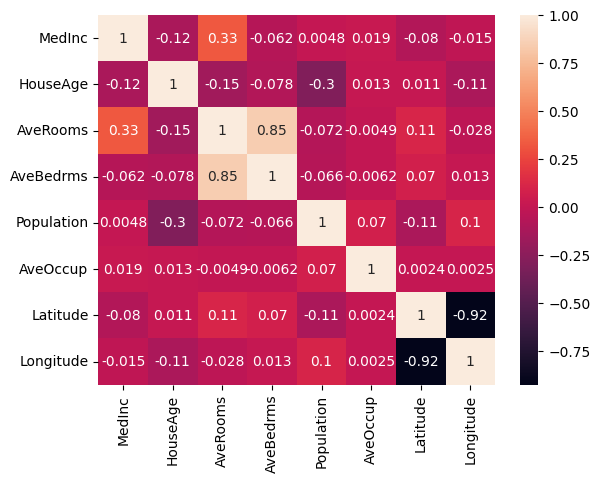

In [129]:
sns.heatmap(X.corr(),annot=True)

In [130]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y, test_size=.3,random_state=42)

In [131]:
X_train_full.shape, X_test.shape

((14448, 8), (6192, 8))

In [132]:
y_train_full.shape, y_test.shape

((14448, 1), (6192, 1))

In [133]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full, test_size=.2,random_state=42)

In [134]:
X_train.shape, X_valid.shape

((11558, 8), (2890, 8))

In [135]:
y_train.shape,y_valid.shape

((11558, 1), (2890, 1))

In [136]:
X_train.shape[1:]

(8,)

In [137]:
## Layer creation
layers = [
    tf.keras.layers.Dense(30, activation="relu",input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(10,activation="relu", name="Hiddenlayer1"),
    tf.keras.layers.Dense(5,activation="relu", name = "Hiddenlayer2"),
    tf.keras.layers.Dense(1)
]

In [138]:
model = tf.keras.models.Sequential(layers)

In [139]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [140]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 30)                270       
                                                                 
 Hiddenlayer1 (Dense)        (None, 10)                310       
                                                                 
 Hiddenlayer2 (Dense)        (None, 5)                 55        
                                                                 
 dense_10 (Dense)            (None, 1)                 6         
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [141]:
## For calculating the accuracy score -r2_score
## for that from keras import backend as be

def coee_determination(y_true,y_pred):
  from keras import backend as be
  ss_res = be.sum(be.square(y_true - y_pred))
  ss_tot = be.sum(be.square(y_true -be.mean(y_true)))
  return (1-ss_res/(ss_tot + be.epsilon()))



In [142]:
loss_function = "mse"
optimizer = "SGD"  ## use with custom learning rate
metrics = [coee_determination]

model.compile(loss = loss_function,
              optimizer = optimizer,
              metrics = metrics
              )

In [143]:
EPOCHS = 10
history = model.fit(X_train, y_train, epochs = EPOCHS,validation_data=(X_valid,y_valid))

Epoch 1/10
362/362 [==============================] - 2s 4ms/step - loss: 1.0076 - coee_determination: 0.2118 - val_loss: 0.5697 - val_coee_determination: 0.5757
Epoch 2/10
362/362 [==============================] - 2s 4ms/step - loss: 0.4898 - coee_determination: 0.6075 - val_loss: 0.4542 - val_coee_determination: 0.6580
Epoch 3/10
362/362 [==============================] - 2s 4ms/step - loss: 0.4236 - coee_determination: 0.6594 - val_loss: 0.4232 - val_coee_determination: 0.6835
Epoch 4/10
362/362 [==============================] - 1s 4ms/step - loss: 0.4041 - coee_determination: 0.6773 - val_loss: 0.4212 - val_coee_determination: 0.6847
Epoch 5/10
362/362 [==============================] - 2s 5ms/step - loss: 0.3894 - coee_determination: 0.6877 - val_loss: 0.4062 - val_coee_determination: 0.6950
Epoch 6/10
362/362 [==============================] - 2s 5ms/step - loss: 0.3810 - coee_determination: 0.6923 - val_loss: 0.3882 - val_coee_determination: 0.7062
Epoch 7/10
362/362 [========

In [144]:
pd.DataFrame(history.history)

,loss,coee_determination,val_loss,val_coee_determination
0,1.007579,0.211827,0.569733,0.575714
1,0.489760,0.607494,0.454245,0.658039
2,0.423584,0.659352,0.423157,0.683492
3,0.404095,0.677263,0.421231,0.684670
4,0.389359,0.687715,0.406221,0.694966
5,0.381029,0.692335,0.388198,0.706192
6,0.375475,0.698405,0.468158,0.636902
7,0.371883,0.701810,0.390568,0.700302
8,0.367336,0.705405,0.375819,0.715704
9,0.362984,0.708093,0.375468,0.717385


<Axes: >

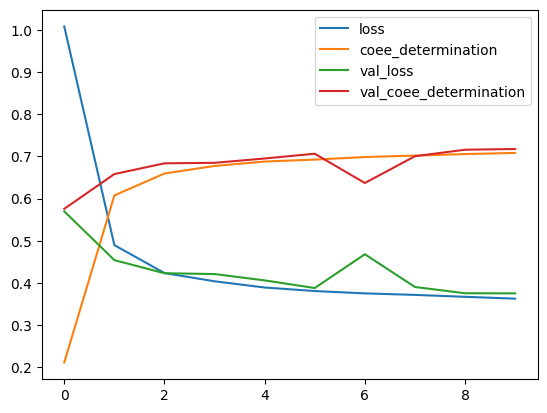

In [145]:
pd.DataFrame(history.history).plot()

In [146]:
model.evaluate(X_test,y_test)

194/194 [==============================] - 0s 2ms/step - loss: 0.3615 - coee_determination: 0.7048


[0.3615177273750305, 0.704776406288147]

In [147]:
new=X_test[0]

In [148]:
new

array([-1.15072871, -0.28910501, -0.56119328, -0.18903492, -0.02433608,
        0.1140199 ,  0.1992181 ,  0.2827794 ])

In [149]:
new.shape

(8,)

In [150]:
new.reshape((1,8))

array([[-1.15072871, -0.28910501, -0.56119328, -0.18903492, -0.02433608,
         0.1140199 ,  0.1992181 ,  0.2827794 ]])

In [151]:
model.predict(new.reshape((1,8)))

1/1 [==============================] - 0s 52ms/step


array([[0.95604956]], dtype=float32)